In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [ ]:
# Load the CSV data from data folder
df = pd.read_csv('../data/benin-malanville.csv')  # Adjust path as needed
df.head(10)

In [ ]:
# Summary Statistics & Missing Values
print(df.describe())
print(df.isna().sum())

In [6]:
# Z-score Outlier Detection
for col in ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'RH', 'WS', 'WSgust',
            'WSstdev','WD','WDstdev','BP','Cleaning','Precipitation',
            'TModA','TModB']:
    if col in df.columns:
        df[f'{col}_zscore'] = zscore(df[col].fillna(df[col].median()))
        df = df[df[f'{col}_zscore'].abs() <= 3]

In [7]:
# Fill missing values
df.fillna(df.median(numeric_only=True), inplace=True)

In [8]:
# Save cleaned data
df.to_csv('../data/benin_clean.csv', index=False)

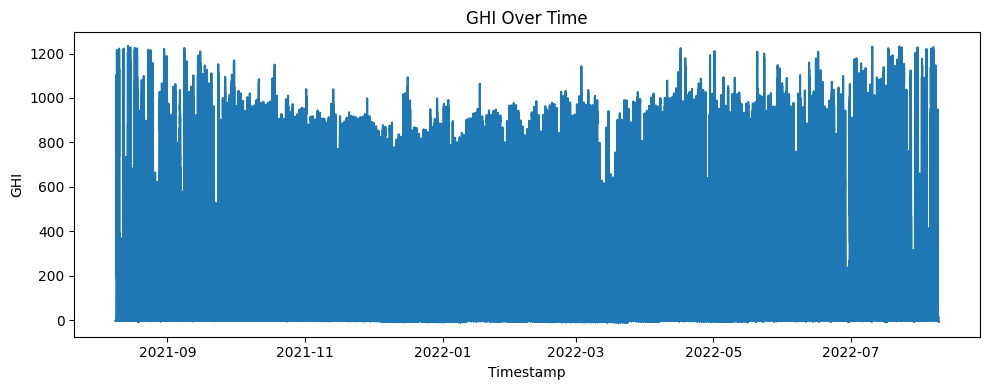

In [9]:
# Plot GHI over time
if 'Timestamp' in df.columns:
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    plt.figure(figsize=(10, 4))
    plt.plot(df['Timestamp'], df['GHI'])
    plt.title('GHI Over Time')
    plt.xlabel('Timestamp')
    plt.ylabel('GHI')
    plt.tight_layout()
    plt.show()